<div style="width: 100%; overflow: hidden;">
    <div style="width: 150px; float: left;"> <img src="data/D4Sci_logo_ball.png" alt="Data For Science, Inc" align="left" border="0"> </div>
    <div style="float: left; margin-left: 10px;"> <h1>Causal Inference In Statistics - A Primer</h1>
        <h1>3.5 Conditional Interventions</h1>
        <p>Bruno Gonçalves<br/>
        <a href="http://www.data4sci.com/">www.data4sci.com</a><br/>
            @bgoncalves, @data4sci</p></div>
    <div style="float: right; margin-right:10px;"> <p><a href="https://amzn.to/3gsFlkO" target=_blank><img src='data/causality.jpeg' width='100px'>
        <!--Amazon Affiliate Link--></a></p></div>
</div>

In [1]:
from collections import Counter
from pprint import pprint

import pandas as pd
import numpy as np

import matplotlib
import matplotlib.pyplot as plt 

from CausalModel import CausalModel

import watermark

%load_ext watermark
%matplotlib inline

We start by print out the versions of the libraries we're using for future reference

In [2]:
%watermark -n -v -m -g -iv

watermark  2.0.2
pandas     1.1.3
matplotlib 3.3.2
numpy      1.19.2
Sun Dec 06 2020 

CPython 3.8.5
IPython 7.19.0

compiler   : Clang 10.0.0 
system     : Darwin
release    : 19.6.0
machine    : x86_64
processor  : i386
CPU cores  : 8
interpreter: 64bit
Git hash   : c45a1c7e7bc2699365be0141cd003127d8ad2a87


Load default figure style

In [3]:
plt.style.use('./d4sci.mplstyle')
colors = plt.rcParams['axes.prop_cycle'].by_key()['color']

Let's load the DAG of Fig 3.3

In [4]:
G = CausalModel('dags/Primer.Fig.3.3.dot')

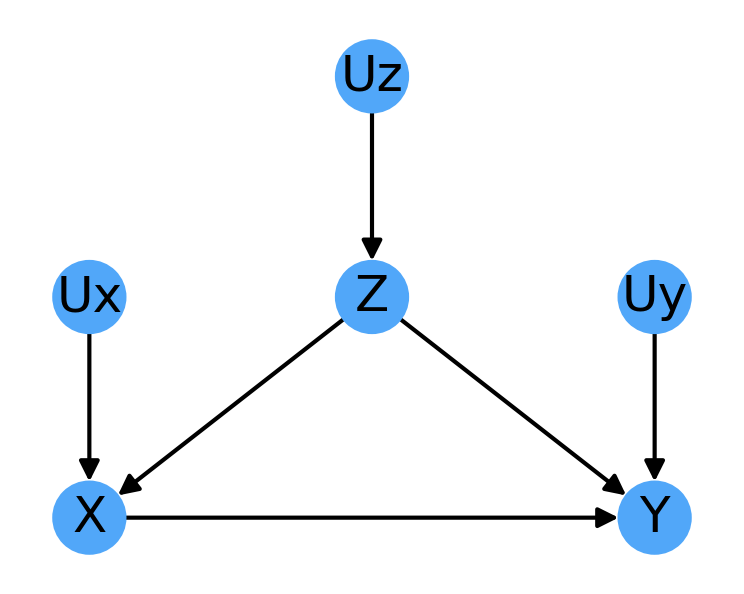

In [5]:
fig, ax = plt.subplots(1, figsize=(3, 2.5))
G.plot(ax=ax)

The conditional intervention graph is:

In [6]:
G2 = G.conditional_intervention_graph('X', [('Z', 'X')], drop_nodes=True)

TypeError: draw_networkx_edges() got an unexpected keyword argument 'linestyle'

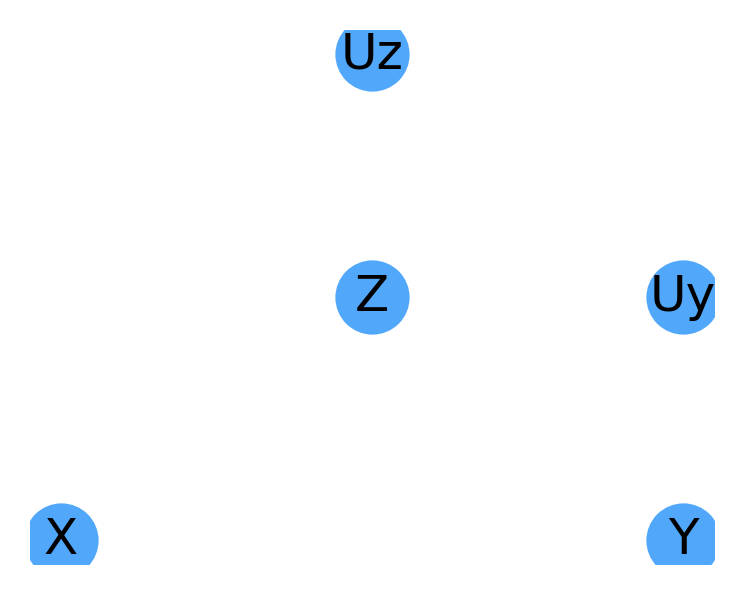

In [7]:
fig, ax = plt.subplots(1, figsize=(3, 2.5))
G2.plot_path(('Z', 'X'), ax=ax, conditional=True, lw=1)

In [10]:
import networkx as nx


In [11]:
?nx.draw_networkx_edges

We start by loading up the DAG from Fig 3.8

In [4]:
G = CausalModel('dags/Primer.Fig.3.8.dot')

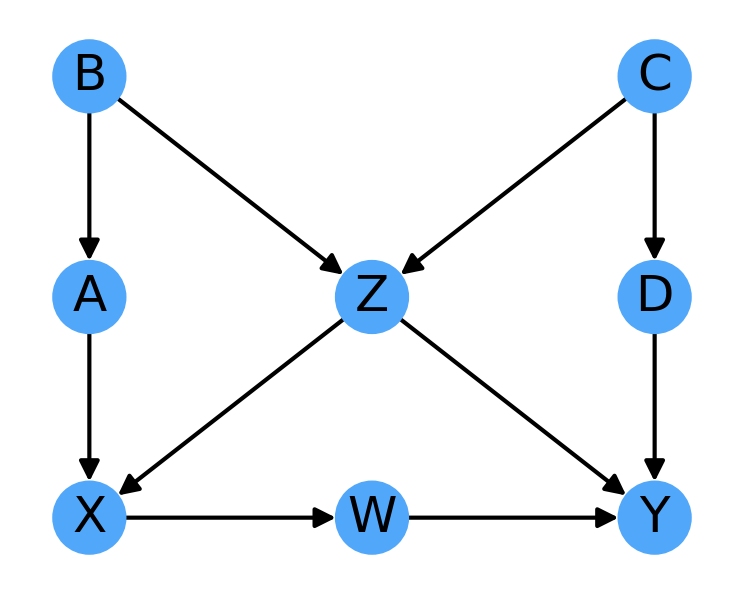

In [5]:
fig, ax = plt.subplots(1, figsize=(3, 2.5))
G.plot(ax=ax)

We can easily find all paths between X and Y

In [6]:
paths = G.all_paths('X', 'Y')

And visualize all the non-direct paths:

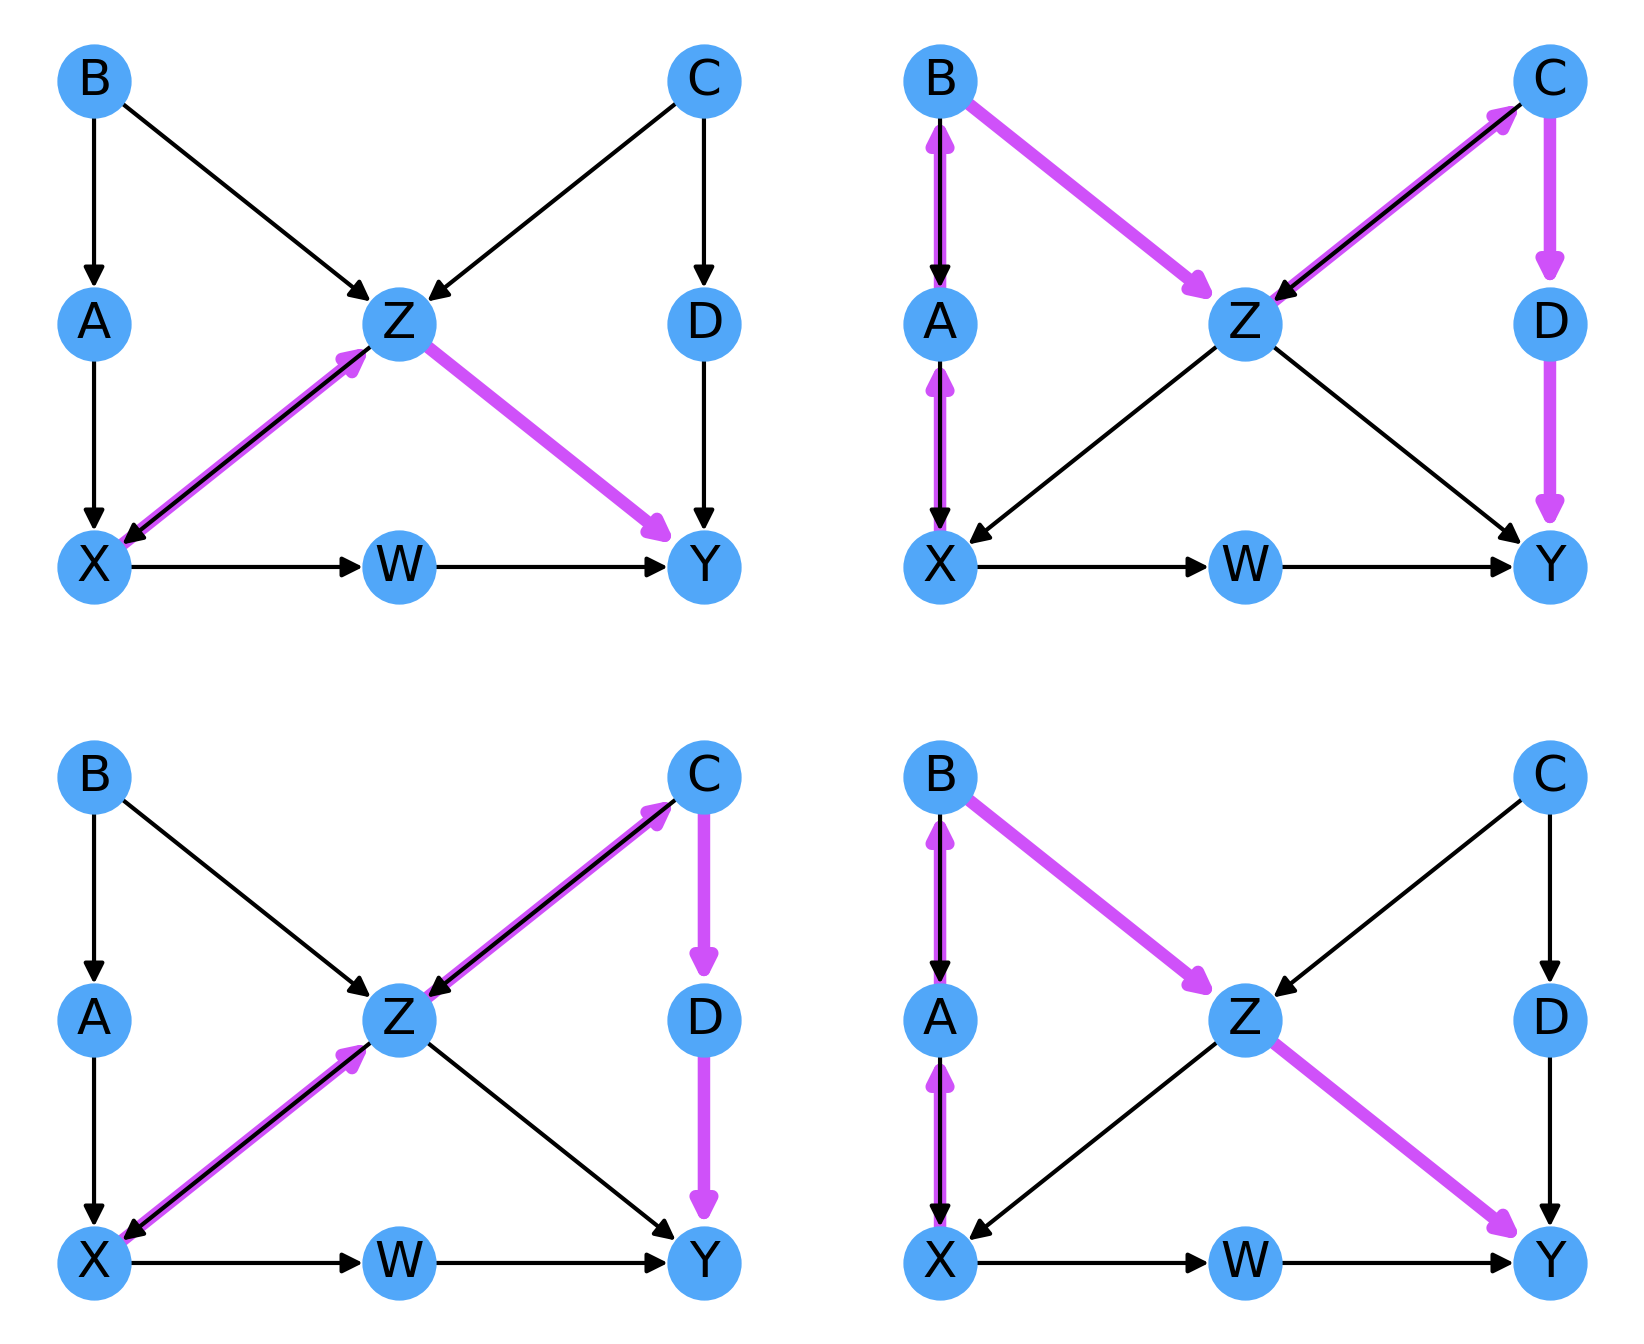

In [7]:
fig, ax_lst = plt.subplots(2, 2, figsize=(6, 5))
ax_lst = np.array(ax_lst).flatten()

pos = 0
for i, path in enumerate(paths):
    if 'W' in path: # skip the direct path
        continue
    G.plot_path(path, ax=ax_lst[pos])
    pos += 1

ax_lst[-1].axis('off');

Since we're conditioning on C our conditioning set is Z, C as all backdoor paths go through Z.

<div style="width: 100%; overflow: hidden;">
     <img src="data/D4Sci_logo_full.png" alt="Data For Science, Inc" align="center" border="0" width=300px> 
</div>